## Konstrukcja obwodów kwantowych w Pennylane


Obwody kwantowe składają się z rejestrów, które reprezentują poszczególne kubity.

![kibu1](../img/kubity1.png)

Domyślnie kubity inicjalizujemy w stanie 0.

![kibu2](../img/kubity2.png)


Liczbę rejestrów możesz ustalić parametrem `wires` przy definicji środowiska wykonawczego `device`. 

```python
dev = qml.device("default.qubit", wires=1)
```


Operacje wykonywane na kubitach nazywamy bramkami. 
Operacje te można wykonywać na jednym albo i wielu kubitach na raz. 
Domyślnie będziemy optymalizować algortymy aby składały się z jak najmniejszej ilości bramek działających na dużą liczbę kubitów. 


Graficznie można rozumieć realizację algorytmu jako stosowanie bramek na poszczególnych kubitach.

![kibu2](../img/obwod1.png)



W bibliotece PennyLane, `obwody kwantowe` reprezentowane są przez `kwantowe funkcje`, realizowane przez klasyczne funkcje w pythonie. 

Schemat kodu penny lane możemy zapisać jako: 

```python
import pennylane as qml

def my_quantum_function(params):

    # Single-qubit operations with no input parameters
    qml.Gate1(wires=0)
    qml.Gate2(wires=1)

    # A single-qubit operation with an input parameter
    qml.Gate3(params[0], wires=0)

    # Two-qubit operation with no input parameter on wires 0 and 1
    qml.TwoQubitGate1(wires=[0, 1])

    # Two-qubit operation with an input parameter on wires 0 and 1
    qml.TwoQubitGate2(params[1], wires=[0, 1])

    # Return the result of a measurement
    return qml.Measurement(wires=[0, 1])
```

Przykładowo

![](../img/przyklad1.png)


```python

def my_first_circuit(theta):

    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    qml.RZ(theta, wires = 0)

    return qml.probs(wires = [0,1])
```

![](../img/pennylane1.png)


Matematycznie całość możemy zapisać jako: 

![](../img/stanpennylane.png)

In [52]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2)
#dev = qml.device("default.qubit", wires=2, shots=1000)

@qml.qnode(dev)
def circ(theta):
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    qml.RZ(theta, wires = 0)
    return qml.state()
    return qml.probs(wires = [0,1])

circ(np.pi)

tensor([4.32978028e-17-0.70710678j, 0.00000000e+00+0.j        ,
        0.00000000e+00+0.j        , 4.32978028e-17+0.70710678j], requires_grad=True)

In [1]:
import pennylane as qml

dev = qml.device("default.qubit", wires=1, shots=100)

@qml.qnode(dev)
def circ():
    qml.Hadamard(wires=0)
    return qml.counts()

In [2]:
circ()

{'0': tensor(56, requires_grad=True), '1': tensor(44, requires_grad=True)}

In [3]:
print(qml.draw(circ)())

0: ──H─┤  Counts


(<Figure size 400x200 with 1 Axes>, <Axes: >)

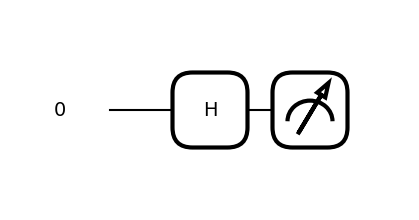

In [4]:
qml.draw_mpl(circ)()

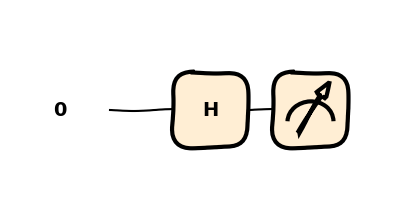

In [5]:
import matplotlib.pyplot as plt
qml.drawer.use_style("sketch")
fig, ax = qml.draw_mpl(circ)()
plt.show()

Matplotlib is building the font cache; this may take a moment.


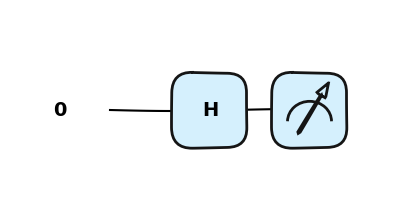

In [6]:
qml.drawer.use_style("pennylane_sketch")
fig, ax = qml.draw_mpl(circ)()
plt.show()

## STANY JEDNO KUBITOWE

$$
\ket{\psi}=\ket{0}
$$

In [7]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    return qml.state()

In [8]:
qc()

tensor([1.+0.j, 0.+0.j], requires_grad=True)

$$
\ket{\psi}=\ket{1}
$$

In [9]:
from pennylane import numpy as np
from pennylane.ops import StatePrep

In [10]:
stan = np.array([0,1])

@qml.qnode(dev)
def circuit():
    StatePrep(stan, wires=0)
    return qml.state()

circuit()

tensor([0.+0.j, 1.+0.j], requires_grad=True)

In [11]:
@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    return qml.state()

qc()

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

$$
\ket{\psi}=\frac{1}{\sqrt{2}} (\ket{0} + \ket{1} ) 
$$

In [12]:
stan = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

@qml.qnode(dev)
def qc_0():
    qml.StatePrep(stan,wires=0)
    return qml.state()

qc_0()

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

## STANY DWU KUBITOWE

$$
\ket{\psi}=\ket{00}
$$
$$
\ket{\psi}=\ket{01}
$$
$$
\ket{\psi}=\ket{10}
$$
$$
\ket{\psi}=\ket{11}
$$

In [13]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def qc():
    #qml.X(wires=1)
    #qml.X(wires=0)
    return qml.state()

qc()

tensor([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j], requires_grad=True)

$$
\ket{\psi}=\frac{1}{2}\left( \ket{00} + \ket{01} + \ket{10} + \ket{11} \right)
$$

In [14]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.state()

qc()

tensor([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j], requires_grad=True)

## Bramki jedno i dwu kubitowe

### Bramka X

Bramka X-gate reprezentowana jest przez macierz Pauli-X : 

$$
X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
$$


Bramka X obraca kubit w kierunku osi na sferze Bloch'a o $\pi$ radianów.
Zmienia $|0\rangle$ na $|1\rangle$ oraz $|1\rangle$ na $|0\rangle$.
Jest często nazywana kwantowym odpowiednikiem bramki NOT lub określana jako `bit-flip`.

In [15]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.X(wires=0)
    return qml.state()

qc()

tensor([0.+0.j, 1.+0.j], requires_grad=True)

In [16]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.PauliX(wires=0)
    return qml.state()

qc()

tensor([0.+0.j, 1.+0.j], requires_grad=True)

(<Figure size 400x200 with 1 Axes>, <Axes: >)

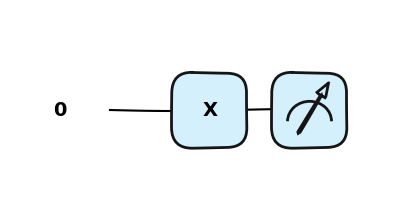

In [17]:
qml.draw_mpl(qc)()

tensor([1.+0.j, 0.+0.j], requires_grad=True)

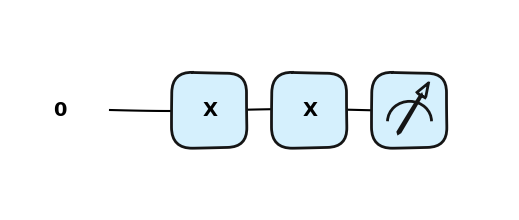

In [18]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.PauliX(wires=0)
    qml.X(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

### bramka SX

Bramka SX jest pierwiastkiem kwadratowym bramki X. Dwukrotne zastosowanie powinno reazlizowac bramkę X.

$$
SX = \frac{1}{2}\begin{pmatrix}
1+i & 1-i \\
1-i & 1+i \\
\end{pmatrix}
$$

tensor([0.5+0.5j, 0.5-0.5j], requires_grad=True)

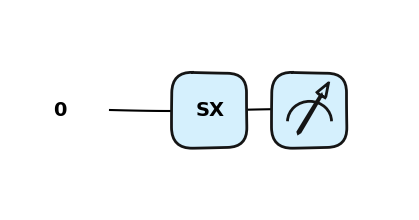

In [19]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.SX(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

tensor([0.+0.j, 1.+0.j], requires_grad=True)

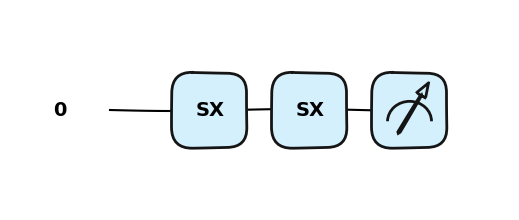

In [20]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.SX(wires=0)
    qml.SX(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

### Z gate

$$
Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}
$$

tensor([ 1.+0.j, -0.+0.j], requires_grad=True)

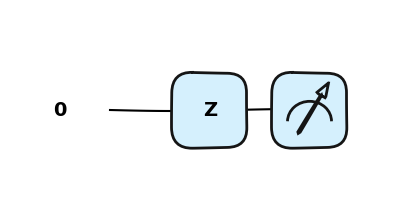

In [21]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.Z(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

tensor([ 1.+0.j, -0.+0.j], requires_grad=True)

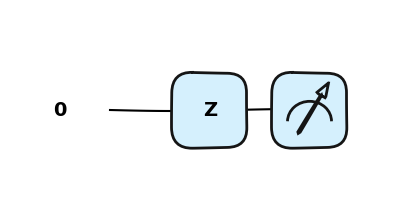

In [22]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.PauliZ(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

### RZ gate

$$ R_Z(\phi) = e^{-i \phi \frac{\sigma_z}{2} }  $$

$$
RZ = \begin{pmatrix}
e ^{-i \frac{\phi}{2} } & 0 \\
0 & e ^{i \frac{\phi}{2} } \\
\end{pmatrix}
$$

In [32]:
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)


def qc(phi):
    qml.RZ(phi=phi, wires=0)
    return qml.state()

qc(np.pi/2)

tensor([0.70710678-0.70710678j, 0.        +0.j        ], requires_grad=True)

(<Figure size 400x200 with 1 Axes>, <Axes: >)

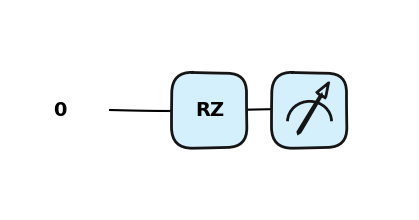

In [38]:
qml.draw_mpl(qc)(np.pi/2)

In [40]:
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)


def qc(phi):
    qml.SX(wires=0)
    qml.RZ(phi=phi, wires=0)
    return qml.state()

qc(np.pi)

tensor([0.5-0.5j, 0.5+0.5j], requires_grad=True)

## Hadamard gate
Bramka Hadamarda przetwarza stan $|0\rangle$ na kombinacje liniowa (superpozycje) $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, co oznacza, że pomiar zwróci z takim samym prawdopodobieństwem stanu `1` lub `0`. 
Stan ten często oznaczany jest jako: $|+\rangle$. 

$$
H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
$$

In [42]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)


def qc():
    qml.Hadamard(wires=0)
    return qml.state()

qc()

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

In [43]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)


def qc():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()

qc()

tensor([1.+0.j, 0.+0.j], requires_grad=True)

https://pennylane.ai/codebook/02-single-qubit-gates/01-x-and-h - zadanie


### Obwody parametryczne

![](../img/mecierzeobrotu.png)


![]()